In [157]:
import sys

import matplotlib.pyplot as plt
import networkx as nx

In [158]:
import numpy as np
import random

In [159]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [160]:
file_path = "./data/gc_18_1"
f = open(file_path, "r")
data = f.read()
sdata = data
data = data.split("\n")
f.close()

In [161]:
n, m = map(int, data[0].split(' '))
G = nx.Graph()
mapping = dict(zip(range(n), range(n)))
G = nx.relabel_nodes(G, mapping)
for i in range(n):
    G.add_edge(i, i)
for i in range(1, len(data) - 1):
    chunk = data[i]
    u, v = map(int, chunk.split(' '))
    #print(n, m)
    G.add_edge(u, v)

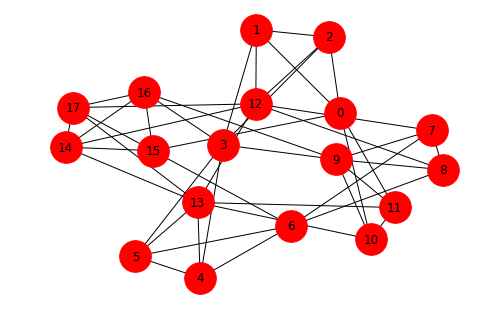

In [162]:
#nx.write_adjlist(G, sys.stdout.buffer)  # write adjacency list to the output
nx.draw(G, with_labels = True, node_size=1000)
plt.show()

In [163]:
color_file = open("colors.txt", "r")
base_colors = color_file.read().split("\n")[:-5]
#print(base_colors)

In [164]:
import solver # main solver file with optimization methods

In [165]:
f = open(file_path, "r")
gdata = f.read()
optimizer_result = solver.solve_it(gdata)

In [166]:
print(optimizer_result)

5 0
0 2 3 1 2 3 0 2 1 0 3 2 0 1 2 1 3 4


In [167]:
def refine_colors(solver_out):
    cols = solver_out.split("\n")[1]
    return list(map(int, cols.split(" ")))

In [168]:
def get_assigned_colors(cnodes, use_base_colors = True):
    n = len(cnodes)
    if use_base_colors == True and n <= len(base_colors):
        indices = np.arange(len(base_colors))
        random.shuffle(indices)
        color_map = ["" for i in range(n)]
        for i in range(max(cnodes) + 1):
            color_map[i] = base_colors[indices[i]]
        colors = []
        for i in range(n):
            colors.append(color_map[cnodes[i]])
        return colors
    colors = np.zeros((n, 3))
    color_map = np.zeros((n, 3))
    delta = 1. / n
    #for i in range(n):
    #    color_map[i, 0] = 1. * i / (n * n)
    #    color_map[i, 1] = np.random.rand(1)
    #    color_map[i, 2] = np.random.rand(1)
    for i in range(n):
        color_map[i] = (np.random.rand(3,1)).reshape(3)
    for i in range(n):
        colors[i] = color_map[cnodes[i]]
    return colors

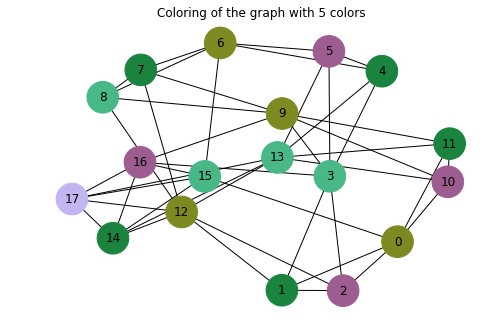

In [169]:
assigned = refine_colors(optimizer_result)
colors = get_assigned_colors(assigned)
nx.draw(G, node_color = colors, with_labels = True, node_size=1000)
plt.title("Coloring of the graph with " + str(max(optimizer_result)) + " colors")
plt.show()

In [170]:
def read_graph(file_path):
    #file_path = "./data/gc_8_1"
    f = open(file_path, "r")
    data = f.read()
    f.close()
    return data

In [171]:
def show_coloring(graph_file):
    graph_data = read_graph(graph_file)
    original = graph_data.split("\n")
    n, m = map(int, original[0].split(' '))
    G = nx.Graph()
    mapping = dict(zip(range(n), range(n)))
    G = nx.relabel_nodes(G, mapping)
    for i in range(n):
        G.add_edge(i, i)
    for i in range(1, len(original) - 1):
        chunk = original[i]
        u, v = map(int, chunk.split(' '))
        G.add_edge(u, v)
    optimizer_result = solver.solve_it(graph_data)
    assigned = refine_colors(optimizer_result) 
    colors = get_assigned_colors(assigned)
    w = min(1, n / m)
    transparency = min(1, n * np.sqrt(n) / m)
    nx.draw(G, node_color = colors, with_labels = True, width=w, alpha=transparency, node_size=1000)
    plt.title("Coloring of the graph with " + str(max(map(int, optimizer_result.split()))) + " colors")
    plt.show()

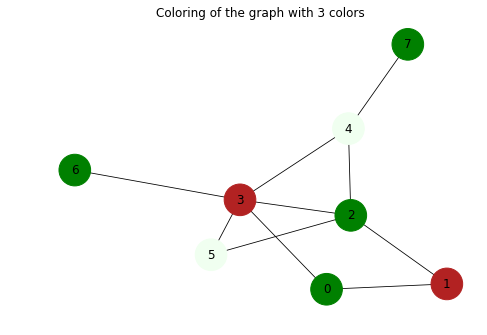

In [172]:
show_coloring("./data/gc_8_1")

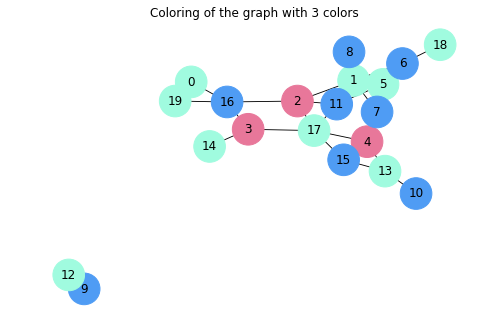

In [173]:
show_coloring("./data/gc_20_1")

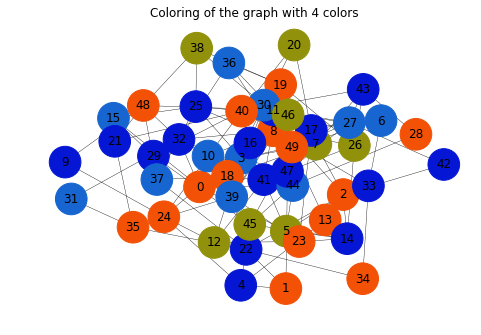

In [174]:
show_coloring("./data/gc_50_1")

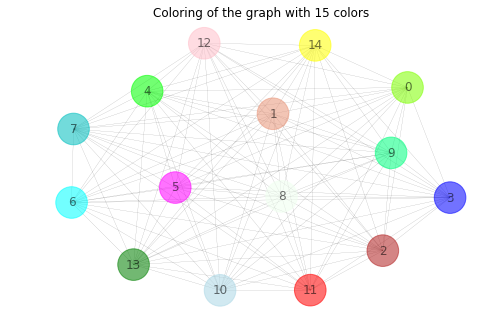

In [175]:
show_coloring("./data/gc_15_1")

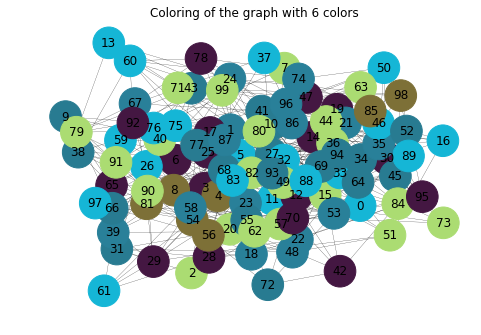

In [176]:
show_coloring("./data/gc_100_1")

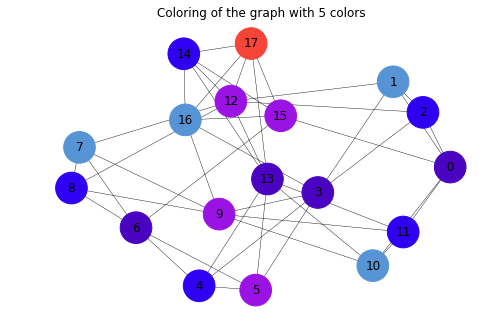

In [177]:
show_coloring("./data/gc_18_1")

In [178]:
import runner

In [179]:
runner.prepare("./data/gc_4_1")

[0, 1, 0, 0]

In [194]:
def show_deterministic_coloring(graph_file):
    graph_data = read_graph(graph_file)
    original = graph_data.split("\n")
    n, m = map(int, original[0].split(' '))
    G = nx.Graph()
    mapping = dict(zip(range(n), range(n)))
    G = nx.relabel_nodes(G, mapping)
    for i in range(n):
        G.add_edge(i, i)
    for i in range(1, len(original) - 1):
        chunk = original[i]
        u, v = map(int, chunk.split(' '))
        G.add_edge(u, v)
    assigned = runner.prepare(graph_file)
    #print(assigned)
    colors = get_assigned_colors(assigned)
    w = min(1, n / m)
    transparency = min(1, n * np.sqrt(n) / m)
    nx.draw(G, node_color = colors, with_labels = True, width=w, alpha=transparency, node_size=1000)
    plt.title("Coloring of the graph with " + str(max(assigned) + 1) + " colors")
    plt.show()

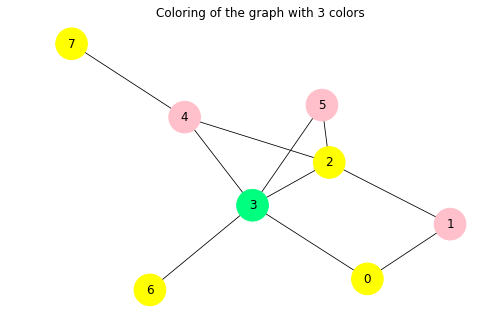

In [181]:
show_deterministic_coloring("./data/gc_8_1")

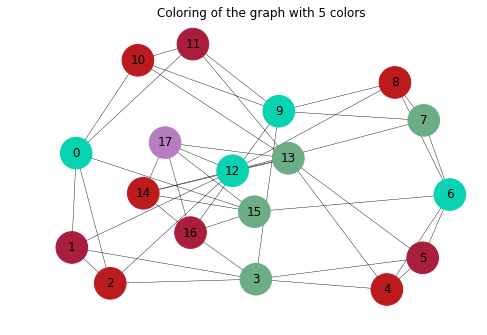

In [182]:
show_coloring("./data/gc_18_1")

In [183]:
runner.get_max_clique("./data/gc_8_1")[0]

3

In [184]:
runner.get_max_clique("./data/gc_15_1")

(15, 32767)

In [185]:
runner.bound_quantum_chromatic_number("./data/gc_15_1")

(15, 15)

In [186]:
runner.bound_quantum_chromatic_number("./data/gc_18_1")

(4, 5)

In [187]:
runner.get_max_clique("./data/gc_18_1")

(4, 159744)

In [188]:
import matplotlib.pyplot as plt

In [189]:
def show_correlation(num_vertices, trials = 100):
    edge_cardinalities = []
    cliques = []
    chromatics = []
    for i in range(trials):
        cl, colors, edges, G = runner.generate_and_bound(num_vertices)
        edge_cardinalities.append(edges)
        cliques.append(cl)
        chromatics.append(colors)
    for i in range(trials): # really
        for j in range(i + 1, trials): # bubbling
            if edge_cardinalities[i] > edge_cardinalities[j]:
                edge_cardinalities[i], edge_cardinalities[j] = \
                    edge_cardinalities[j], edge_cardinalities[i]
                cliques[i], cliques[j] = cliques[j], cliques[i]
                chromatics[i], chromatics[j] = chromatics[j], chromatics[i]
    plt.plot(chromatics, alpha=0.9, label="classical graph chromatic number")
    plt.plot(cliques, alpha=0.4, label="maximum clique")
    plt.title("Qcn ~ |E| correlation over graphs |V| = " + str(num_vertices))
    plt.xlabel("graph iteration counter")
    plt.legend()
    plt.plot()

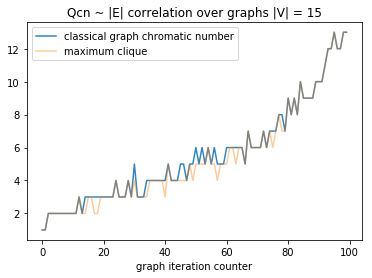

In [190]:
show_correlation(15, 100)

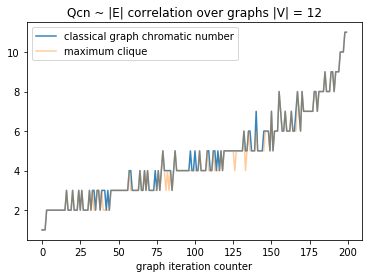

In [191]:
show_correlation(12, 200)

In [218]:
def show_max_clique(graph_file):
    graph_data = read_graph(graph_file)
    original = graph_data.split("\n")
    n, m = map(int, original[0].split(' '))
    G = nx.Graph()
    mapping = dict(zip(range(n), range(n)))
    G = nx.relabel_nodes(G, mapping)
    for i in range(n):
        G.add_edge(i, i)
    for i in range(1, len(original) - 1):
        chunk = original[i]
        u, v = map(int, chunk.split(' '))
        G.add_edge(u, v)
    #assigned = runner.prepare(graph_file)
    #print(assigned)
    #colors = get_assigned_colors(assigned)
    clique = runner.get_max_clique(graph_file)
    colors = ['green' for i in range(n)]
    mask = clique[1]
    for i in range(n):
        if (mask & (1 << i)) > 0:
            colors[i] = 'blue'
    w = min(1, n / m)
    transparency = min(1, n * np.sqrt(n) / m)
    nx.draw(G, node_color = colors, with_labels = True, width=w, alpha=transparency, node_size=1000)
    plt.title("Maximum cliques in the graph has size " + str(clique[0]) + "(clique vertices in blue)")
    plt.show()

In [216]:
def generate_non_matching_pairs(num_vertices, trials = 100):
    for i in range(trials):
        cl, colors, edges, G = runner.generate_and_bound(num_vertices)
        if cl != colors:
            print("A graph found with different coloring and clique numbers")
            #show_coloring("./data/rng_graph.txt")
            show_deterministic_coloring("./data/rng_graph.txt")
            show_max_clique("./data/rng_graph.txt")
            return True
    print("No graphs found with different coloring and clique numbers")
    return False

A graph found with different coloring and clique numbers


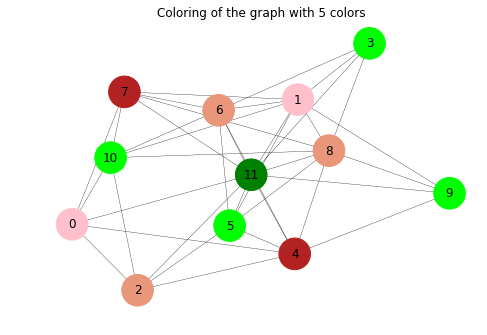

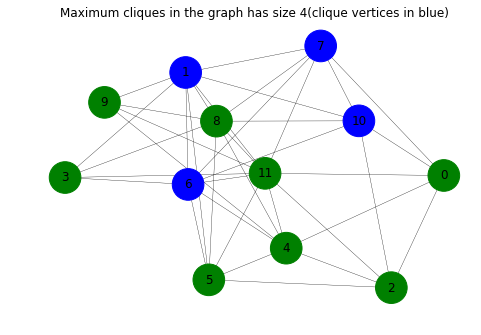

True

In [219]:
generate_non_matching_pairs(12)
